homework 5
---
due: April 24 2022

authors: pegler, prüwasser, scheftner

# Part 1: function to perform calculation

this function should take 3 inputs in the following order 1. predictor1 (age), 2. predictor (size), 3. outcome variable (price)

your function has to

1. create a predictor matrix (as above), starting with a column of ones, and the two predictors. (3 columns in total)
2. use lstsq () to fit the regression model, as above
3. the function should return 2 outputs, the 1st one is an array containing the 3 fitted regression parameters (1st output argument of lstsq()) , 2nd output should be the residual error (2nd output argument of lstsq()),

!! make sure that your function works for inputs of any size (this is important when you add the column of ones), (but you can assume that all of the 3 input vectors have the same length (otherwise the analysis does not make sense) 

In [1]:
def my_mult_regr():
    ...

# Part 2: standardized predictors

standardize (z-score) your predictors by subtracting the mean and dividing by the standard deviaton.

fit a regression with both the single predictor and the two predictor models and compare error and beta weigths for fitting the model to standardized and non-standardized data-sets

use the MyMultRegr() function in this solution

# Part 3: car price simulation  

price as a function of age

In [18]:
# given values
mean_price_new = 30_000
sd_price = 10_000
n = 200
age_lower = 0
age_upper = 70

## Finding a function and coefficients for a realistic curve

To fiddle with the values of the function, we could create numpy arrays and plot them, but we choose the sympy package as it's perfect for this kind of task.

https://www.sympy.org

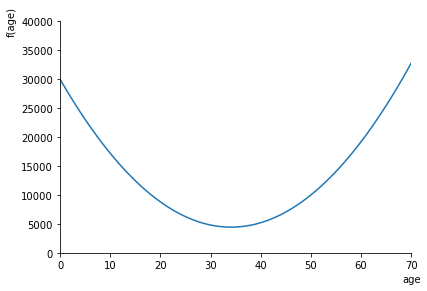

In [19]:
import sympy as spy

age, price_func = spy.symbols("age value")

b_0 = mean_price_new # avg value at age = 0
b_1 = -1500 # value loss per year
b_2 = 22 # value gain per year*year

price_func = b_0 + b_1 * age + b_2 * age**2

spy.plot(price_func,(age, 0, 70),xlim=(0,70),ylim=(0,40_000),axis_center=(0,0));

### Minimum is where derivative is 0

Derivative of price for age

In [20]:
d_age = spy.diff(price_func,age)
d_age

44*age - 1500

Age at minimum value

In [21]:
age_min = float(spy.solve(d_age)[0])
age_min

34.09090909090909

Minimum value

In [22]:
price_min = float(price_func.evalf(subs={age:age_min}))
price_min

4431.818181818182

## Create simulated data from function

Let's remember the price function from before

In [23]:
price_func

22*age**2 - 1500*age + 30000

That means function for one datapoint is:

$price = price_{mean} - 1500age + 22age² + error$

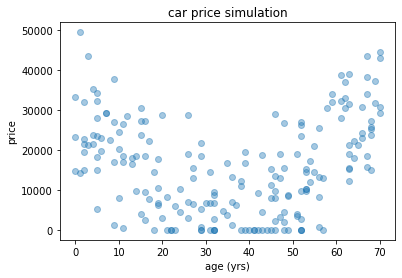

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# creating ages array (uniformly distributed)
ages = np.random.randint(age_lower,age_upper+1,n)

# error array
err = np.random.normal(0, scale = sd_price, size=n)

# prices array
prices = np.array([b_0 + b_1 * ages[i] + b_2 * ages[i]**2 + err[i] for i in range(n)])

# limit lowest price to 0
prices = np.where(prices<0, 0, prices)

plt.scatter(ages,prices, alpha=0.4)
plt.ylabel("price")
plt.xlabel("age (yrs)")
plt.title("car price simulation");

## Fit 3 regression models to the simulated data
  

print the obtained residual error for the three models and visualize the model predictions

### 1. intercept + linear predictor $age$

In [138]:
from scipy import linalg

# adding required column of ones to the predictor variable (because of matrix- vector multiplication)
ages_ = np.stack([ages,np.ones(n)], axis=1)

coeff,total_error,_,_ = linalg.lstsq(ages_,prices)
price_pred_1 = np.array([coeff[1] + coeff[0] * ages[i] for i in range(n)])

print("total error (scipy.linalg):",format(total_error,"e"))
print("intercept b_0 =",coeff[1])
print("slope b_1 =",coeff[0])

total error (scipy.linalg): 2.805544e+10
intercept b_0 = 14397.854680989696
slope b_1 = 38.82173272974577


In [137]:
res = (price_pred_1 - prices)**2
total_error_1 = np.sum(res)
print("total error (manually calculated):",format(total_error_1,"e"))

total error (manually calculated): 2.805544e+10


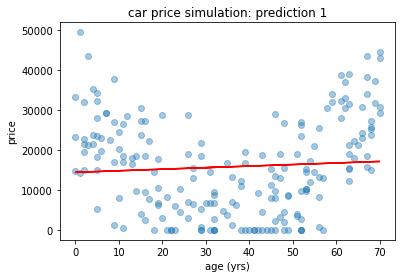

In [70]:
plt.scatter(ages,prices, alpha=0.4)
plt.plot(ages,price_pred_1, c="red")
plt.ylabel("price")
plt.xlabel("age (yrs)")
plt.title("car price simulation: prediction 1");

### 2. intercept + linear predictor $age$ + quadratic predictor $age²$

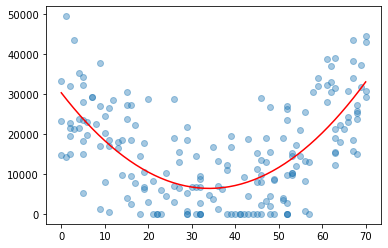

In [119]:
model_2 = np.poly1d(np.polyfit(ages, prices, 2))

polyline = np.linspace(age_lower, age_upper)
plt.scatter(ages, prices, alpha=0.4)
plt.plot(polyline, model_2(polyline), c="red")
plt.show()

In [130]:
print("intercept b_0 =",model_2[0])
print("slope b_1 =",model_2[1])
print("slope b_2 =",model_2[2])

intercept b_0 = 30271.191114779976
slope b_1 = -1403.2635874472335
slope b_2 = 20.601281322552982


In [135]:
price_pred_2 = model_2(ages)
res_2 = (price_pred_2 - prices)**2
total_error_2 = np.sum(res_2)
print("total error (manually calculated):",format(total_error_2,"e"))

total error (manually calculated): 1.537800e+10


### 3. intercept + linear predictor $age$ + quadratic predictor $age^2$ + cubic predicor $age³$

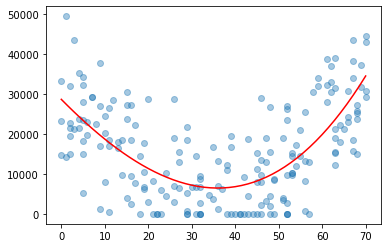

In [118]:
model_3 = np.poly1d(np.polyfit(ages, prices, 3))

polyline = np.linspace(age_lower, age_upper)
plt.scatter(ages, prices, alpha=0.4)
plt.plot(polyline, model_3(polyline), c="red")
plt.show()

In [131]:
print("intercept b_0 =",model_3[0])
print("slope b_1 =",model_3[1])
print("slope b_2 =",model_3[2])
print("slope b_3 =",model_3[3])

intercept b_0 = 28636.33613719146
slope b_1 = -1101.9545301643452
slope b_2 = 9.869208040336787
slope b_3 = 0.10091296333285114


In [139]:
price_pred_3 = model_3(ages)
res_3 = (price_pred_3 - prices)**2
total_error_3 = np.sum(res_3)
print("total error (manually calculated):",format(total_error_3,"e"))

total error (manually calculated): 1.527833e+10


# Bonus: reliability of regression analysis

since we created the data, we can see how close are the true values to the 'generative' model next task is to systematically investigate this relationship you will have to manipualte the number of datapoints, and the error in the model, and analyze the difference between the data generating and the fitted regression parameters

this task is somewhat analogous to the t-test simulation task 
